In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
from os import path
pd.set_option('display.max_colwidth', None)
import csv
import os
import matplotlib.pyplot as plt

In [2]:
cd /scratch/users/shrestp/mover/EPIC_flowsheets_cleaned/

/scratch/users/shrestp/mover/EPIC_flowsheets_cleaned


In [3]:
ls

flowsheet_part10.csv  flowsheet_part17.csv  flowsheet_part5.csv
flowsheet_part11.csv  flowsheet_part18.csv  flowsheet_part6.csv
flowsheet_part12.csv  flowsheet_part19.csv  flowsheet_part7.csv
flowsheet_part13.csv  flowsheet_part1.csv   flowsheet_part8.csv
flowsheet_part14.csv  flowsheet_part2.csv   flowsheet_part9.csv
flowsheet_part15.csv  flowsheet_part3.csv
flowsheet_part16.csv  flowsheet_part4.csv


### Combine all flowsheets and save 

In [4]:
dfs = []

In [5]:
# Iterate over each CSV file in the input directory
for file_name in os.listdir('./'):
    if file_name.endswith('.csv'):
        # Full path to the CSV file
        file_path = os.path.join('./', file_name)
        print(f"Processing {file_path}")
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Append the DataFrame to the list
        dfs.append(df)

Processing ./flowsheet_part9.csv
Processing ./flowsheet_part15.csv
Processing ./flowsheet_part18.csv
Processing ./flowsheet_part11.csv
Processing ./flowsheet_part2.csv
Processing ./flowsheet_part7.csv
Processing ./flowsheet_part12.csv
Processing ./flowsheet_part16.csv
Processing ./flowsheet_part17.csv
Processing ./flowsheet_part10.csv
Processing ./flowsheet_part13.csv
Processing ./flowsheet_part14.csv
Processing ./flowsheet_part6.csv
Processing ./flowsheet_part3.csv
Processing ./flowsheet_part1.csv
Processing ./flowsheet_part8.csv
Processing ./flowsheet_part19.csv
Processing ./flowsheet_part5.csv
Processing ./flowsheet_part4.csv


In [6]:
combined_df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_117779/1558772002.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, ignore_index=True)


In [7]:
combined_df

,Unnamed: 0,LOG_ID,MRN,FLO_NAME,FLO_DISPLAY_NAME,RECORD_TYPE,RECORDED_TIME,MEAS_VALUE,UNITS
0,1582,da51bbbe44b985b2,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
1,1584,a7ff644f99bb2f2d,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
2,1587,b2bf5178b216dff9,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
3,1588,fef3b94d7a5b1638,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
4,1592,a7ff644f99bb2f2d,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
...,...,...,...,...,...,...,...,...,...
28465712,55687956,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
28465713,55687962,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
28465714,55687969,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
28465715,55687971,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN


In [8]:
combined_df['MRN'].nunique()

36870

In [9]:
df_cleaned = combined_df.dropna(subset=['MEAS_VALUE'])
#df_cleaned = df_cleaned.drop(df_cleaned['UNITS'])

In [11]:
df_cleaned = df_cleaned.drop_duplicates()

In [12]:
df_cleaned

,Unnamed: 0,LOG_ID,MRN,FLO_NAME,FLO_DISPLAY_NAME,RECORD_TYPE,RECORDED_TIME,MEAS_VALUE,UNITS
0,1582,da51bbbe44b985b2,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
1,1584,a7ff644f99bb2f2d,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
2,1587,b2bf5178b216dff9,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
3,1588,fef3b94d7a5b1638,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
4,1592,a7ff644f99bb2f2d,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
...,...,...,...,...,...,...,...,...,...
28465712,55687956,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
28465713,55687962,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
28465714,55687969,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
28465715,55687971,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN


In [13]:
output_file = 'final_map_df.csv'
df_cleaned.to_csv(output_file, index=False)

### Analysis

In [15]:
df = pd.read_csv('final_map_df.csv', index_col=0)

In [6]:
#df = df.drop_duplicates()

In [16]:
df

,LOG_ID,MRN,FLO_NAME,FLO_DISPLAY_NAME,RECORD_TYPE,RECORDED_TIME,MEAS_VALUE,UNITS
Unnamed: 0,,,,,,,,
1582,da51bbbe44b985b2,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
1584,a7ff644f99bb2f2d,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
1587,b2bf5178b216dff9,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
1588,fef3b94d7a5b1638,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
1592,a7ff644f99bb2f2d,b8bef0111ecada9c,Vital Signs,MAP (mmHg),POST-OP,2021-07-30 23:00:00,102.0,NaN
...,...,...,...,...,...,...,...,...
55687956,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
55687962,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN
55687969,b982da223bc1459f,21d903105dfb34f0,Vital Signs,MAP (mmHg),POST-OP,2020-09-11 10:00:00,89.0,NaN


In [21]:
df['MEAS_VALUE'].isna().value_counts()

MEAS_VALUE
False    28421216
Name: count, dtype: int64

In [22]:
df['LOG_ID'].nunique()

58592

In [23]:
df['MRN'].nunique()

36869

In [24]:
df_patient = df[df['MRN'] == '4c482e1b3ab4127a']

In [25]:
df_patient['LOG_ID'].nunique()

4

In [26]:
df_patient['LOG_ID'].unique()

array(['d586108388315523', '41c689c44078aab6', 'cf7ac282352364cd',
       'f101063f08eb3a3e'], dtype=object)

In [27]:
df_patient_visit = df_patient[df_patient['LOG_ID'] == 'd586108388315523']

In [28]:
df_patient_visit

,LOG_ID,MRN,FLO_NAME,FLO_DISPLAY_NAME,RECORD_TYPE,RECORDED_TIME,MEAS_VALUE,UNITS
Unnamed: 0,,,,,,,,
5,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-10-18 00:00:00,77.0,NaN
4082,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-10-18 00:00:00,77.0,NaN
8041,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-10-18 00:00:00,77.0,NaN
11505,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-10-18 00:00:00,77.0,NaN
18074,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-10-18 00:00:00,77.0,NaN
...,...,...,...,...,...,...,...,...
27719295,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-11-14 12:22:00,70.0,NaN
27719301,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-11-14 12:22:00,70.0,NaN
27719310,d586108388315523,4c482e1b3ab4127a,Vital Signs,MAP (mmHg),POST-OP,2019-11-14 12:22:00,70.0,NaN


In [29]:
df_patient_visit['RECORDED_TIME'].nunique()

604

In [30]:
patient_id = '4c482e1b3ab4127a'
log_id = 'd586108388315523'

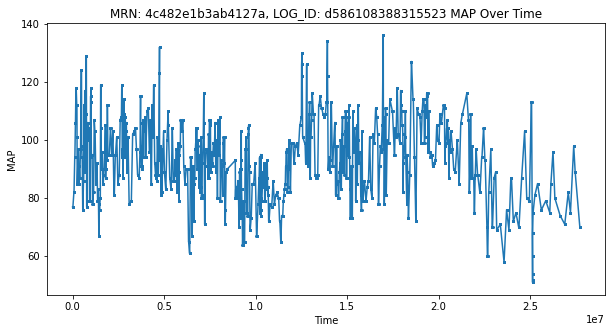

In [31]:
#plt.scatter(x=df_patient_visit['RECORDED_TIME'], y=df_patient_visit['MEAS_VALUE'], s=0.1)
fig, ax = plt.subplots(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('MAP')
plt.title(f'MRN: {patient_id}, LOG_ID: {log_id} MAP Over Time')
plt.plot(df_patient_visit['MEAS_VALUE'], marker='o', linestyle='-', markersize=2)